# Visualizing The Health of The Bees 🐝
Honey is a good source of food. Honey = Happy. That is why we need to examine and analyze the health of the bees because no bees = no honey.
Aside from that, and most importantly, **we cant live without bees!**

## Analyzing the health of the bee population.
Lets load the honey dataset found in this repository. In the honey.csv dataset, there is a column called numcol, which contains the number of bees in a colony

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
honey = pd.read_csv('../../data/honey.csv')
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


Let's create a scatterplot that shows the relationship between the number of bees in a colony and the state using sns.relplot

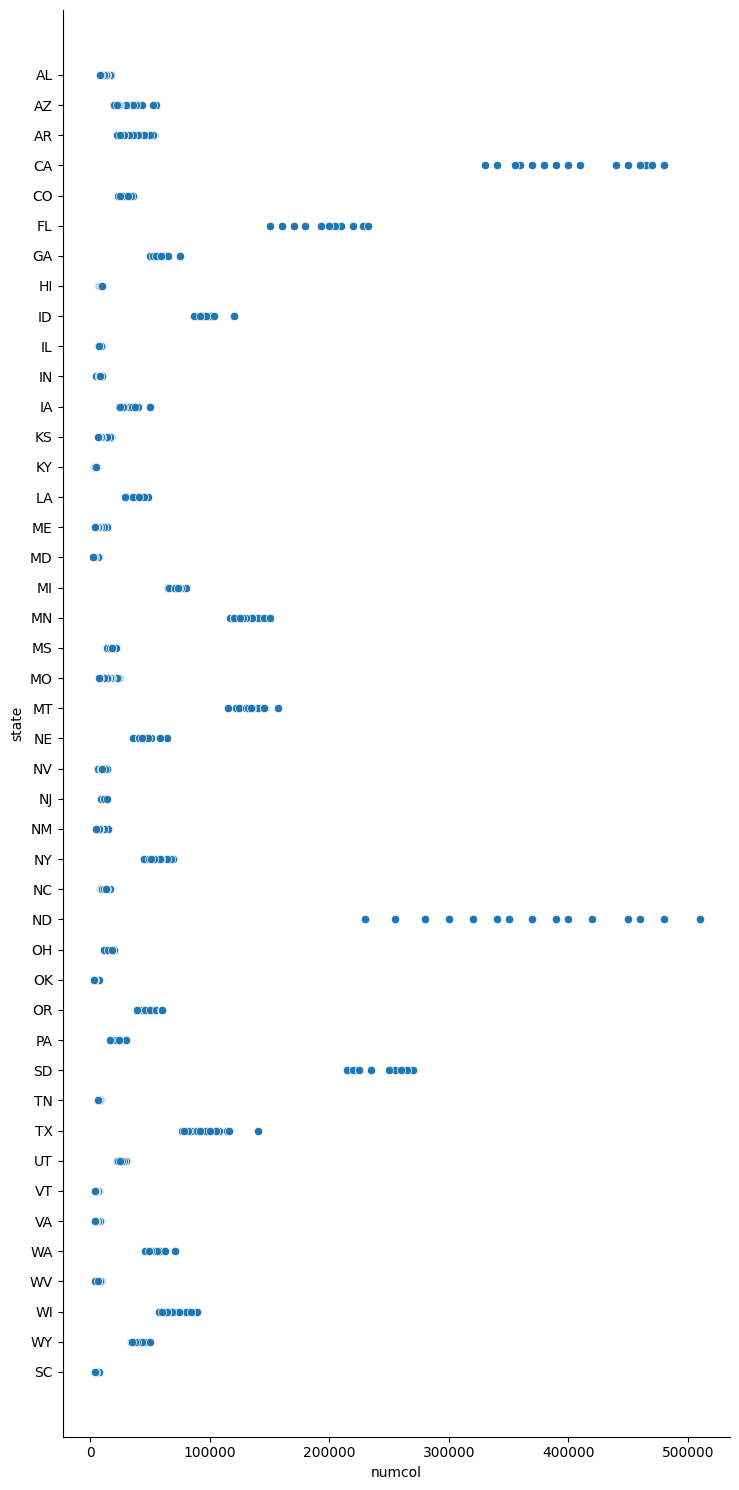

In [29]:
sns.relplot(data = honey, x = "numcol", y = "state", height = 15, aspect= .5)

<p style = "text-align:center"> Figure 1 </p>

The plot only shows the distribution of the number of bees in a colony in each state. It does not show the accompanying date for each circle.

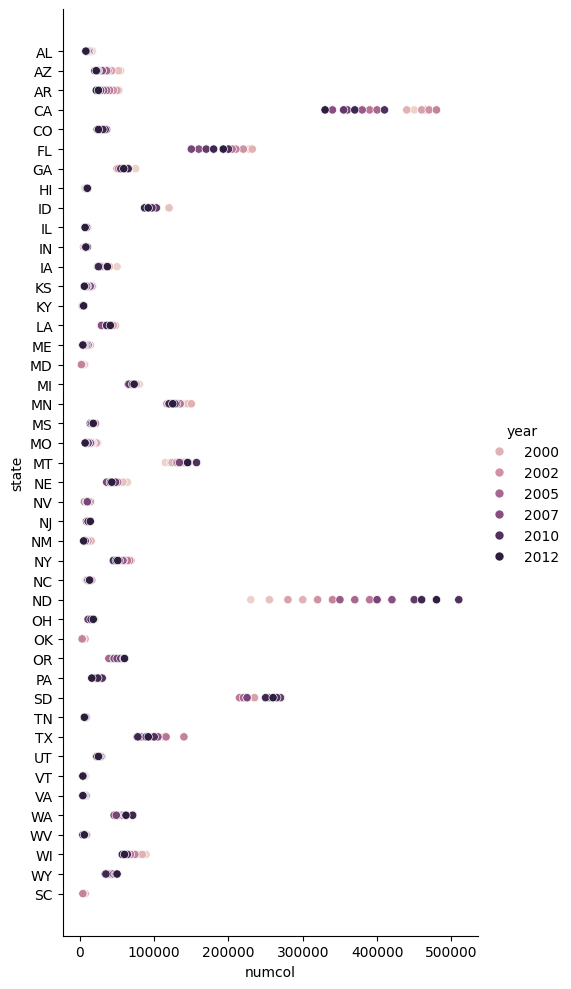

In [30]:
sns.relplot(data = honey, x = "numcol", y = "state", height = 10, aspect= .5,  hue = "year")

<p style = "text-align:center"> Figure 2 </p>

We can see that the number of colonies over time differ as time passes by, either they are dwindling, or they are growing, as depicted by the hue that signifies the year. For example, the data for the number of colonies of bees in California in the year 2000 is much larger than the following years. This is very alarming!

We might want to look at the line chart of the number of bees in a colony in each state for each year.

In [31]:
len(pd.unique(honey['year']))

15

since the number of unique states is 15, we can use facit grid to plot all of them.

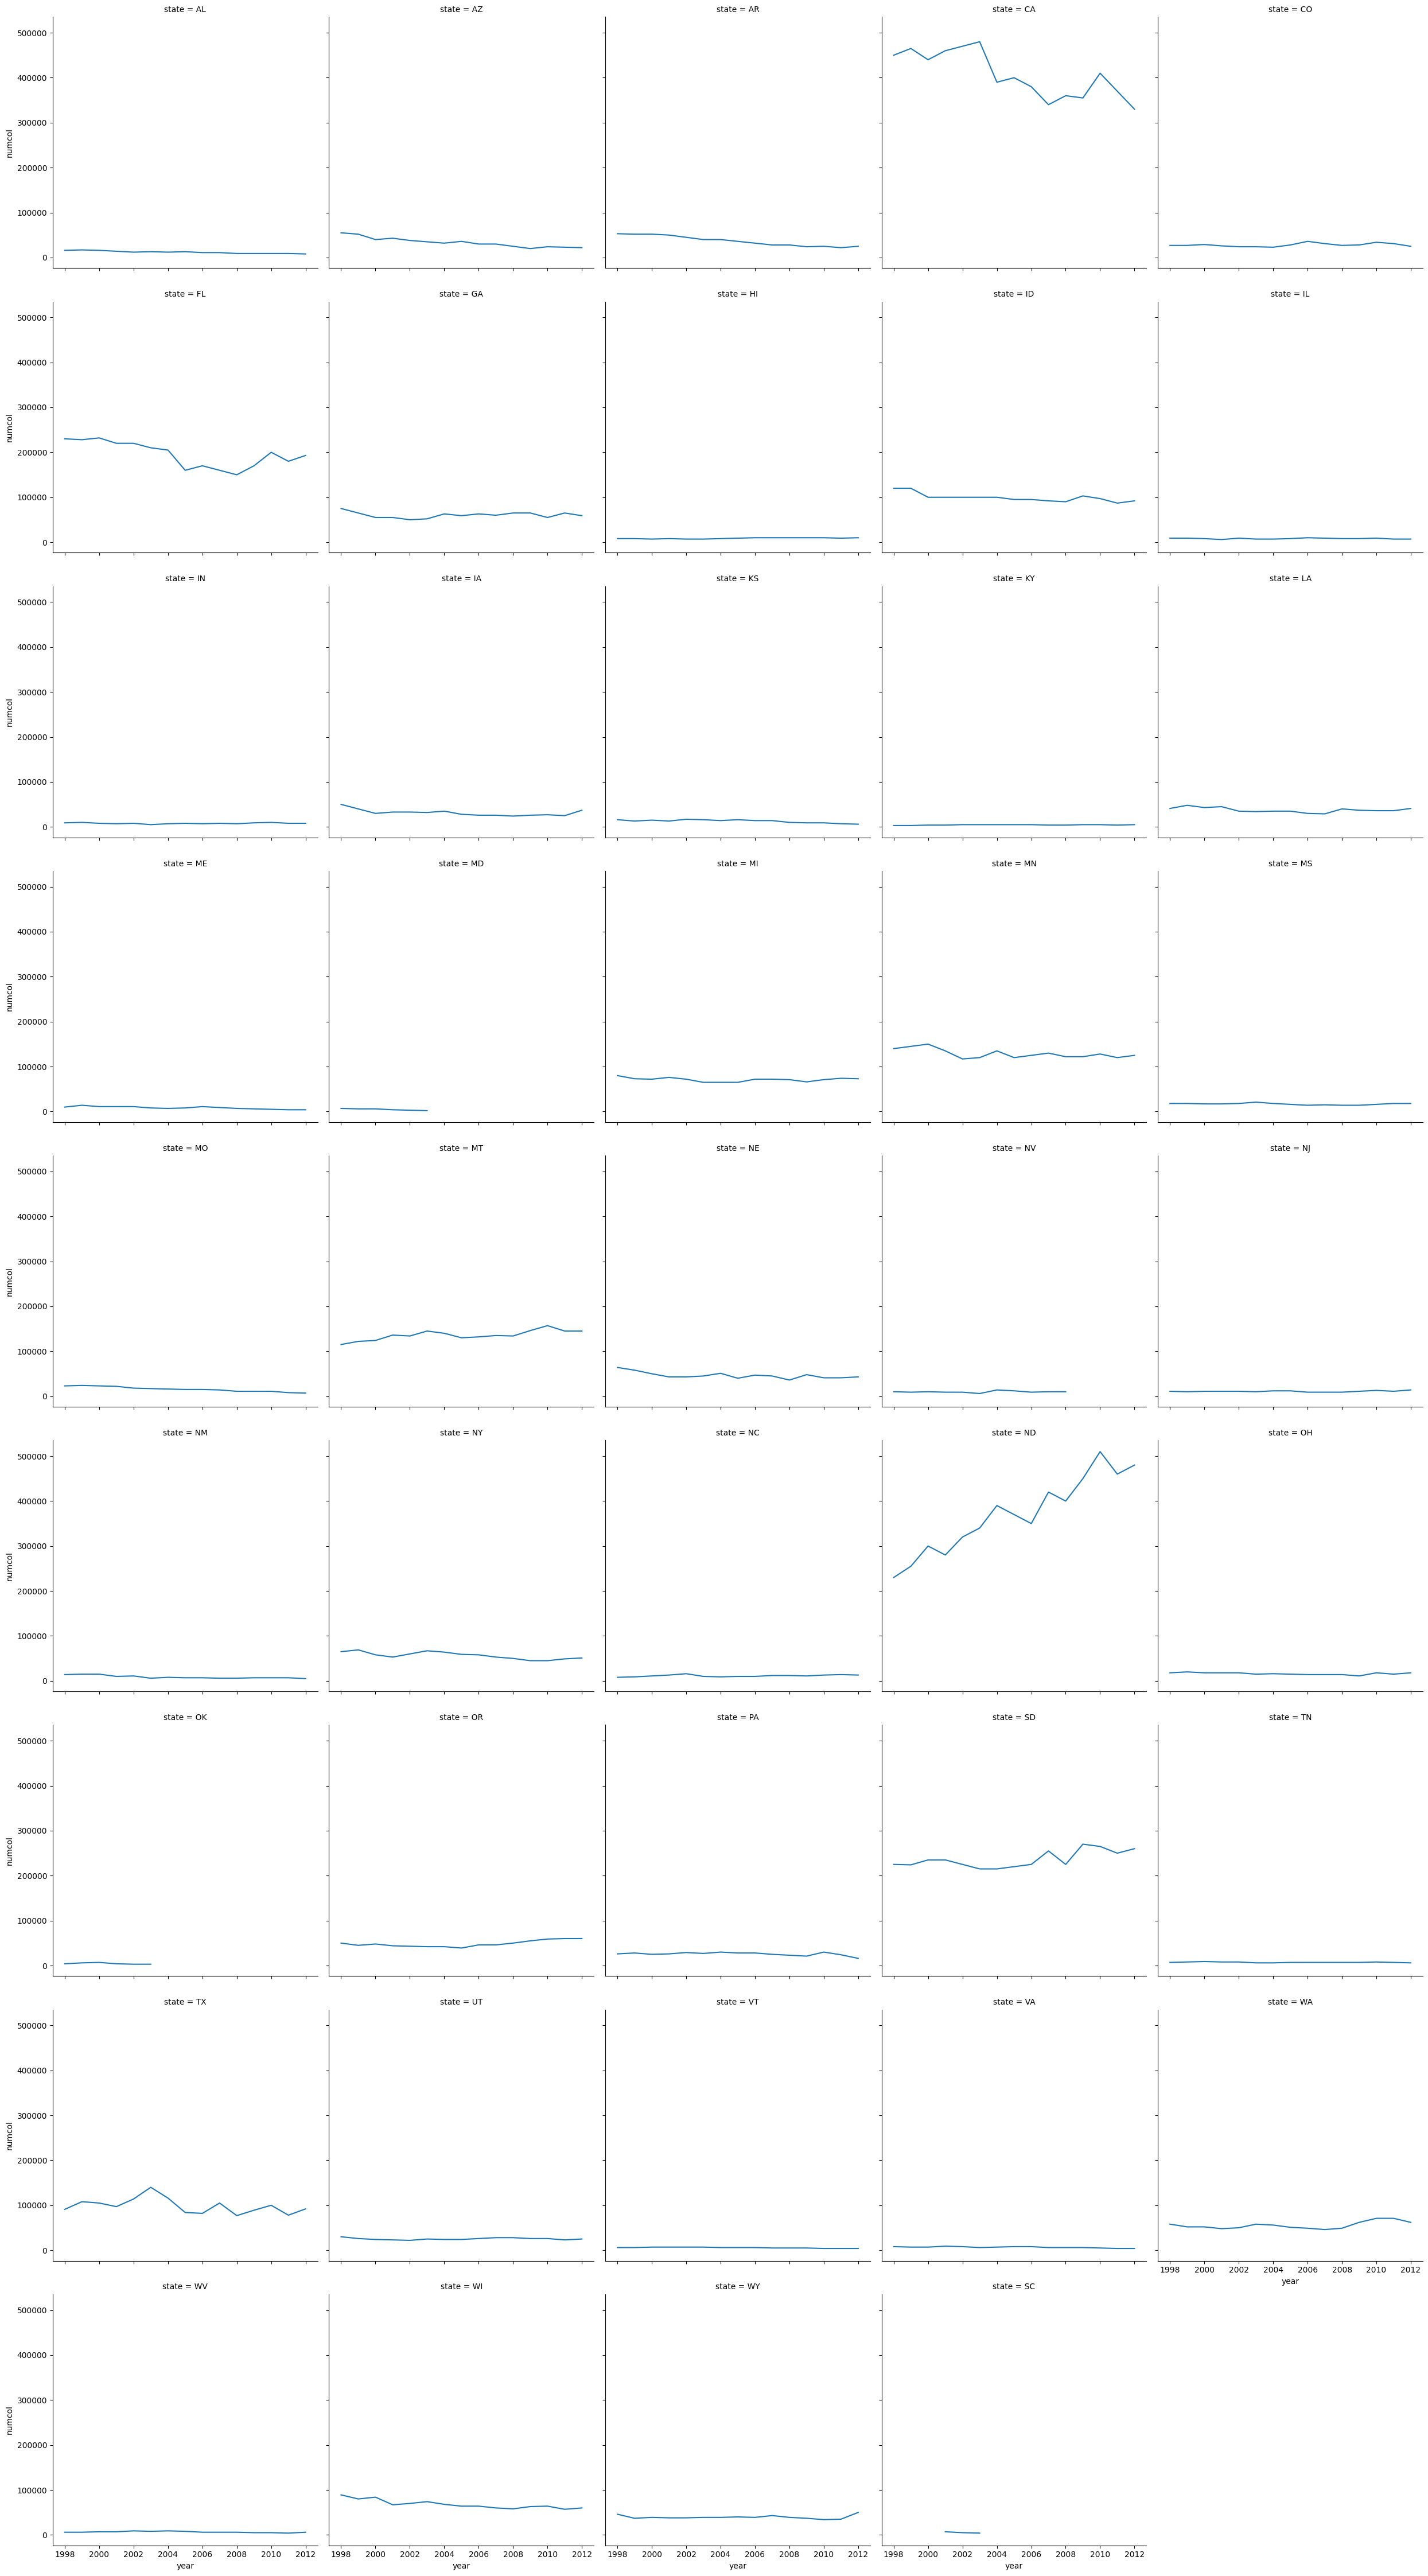

In [32]:
sns.relplot(
    data = honey,
    x = "year",
    y = "numcol",
    col = "state",
    col_wrap = 5,
    kind = "line"
)

We can see that the plot is not really helpful for some state as the y-axis is scaled from 0 to 500000, leaving other states with relatively low changes in the number of colonies look like it is not changing much. Let's change that.

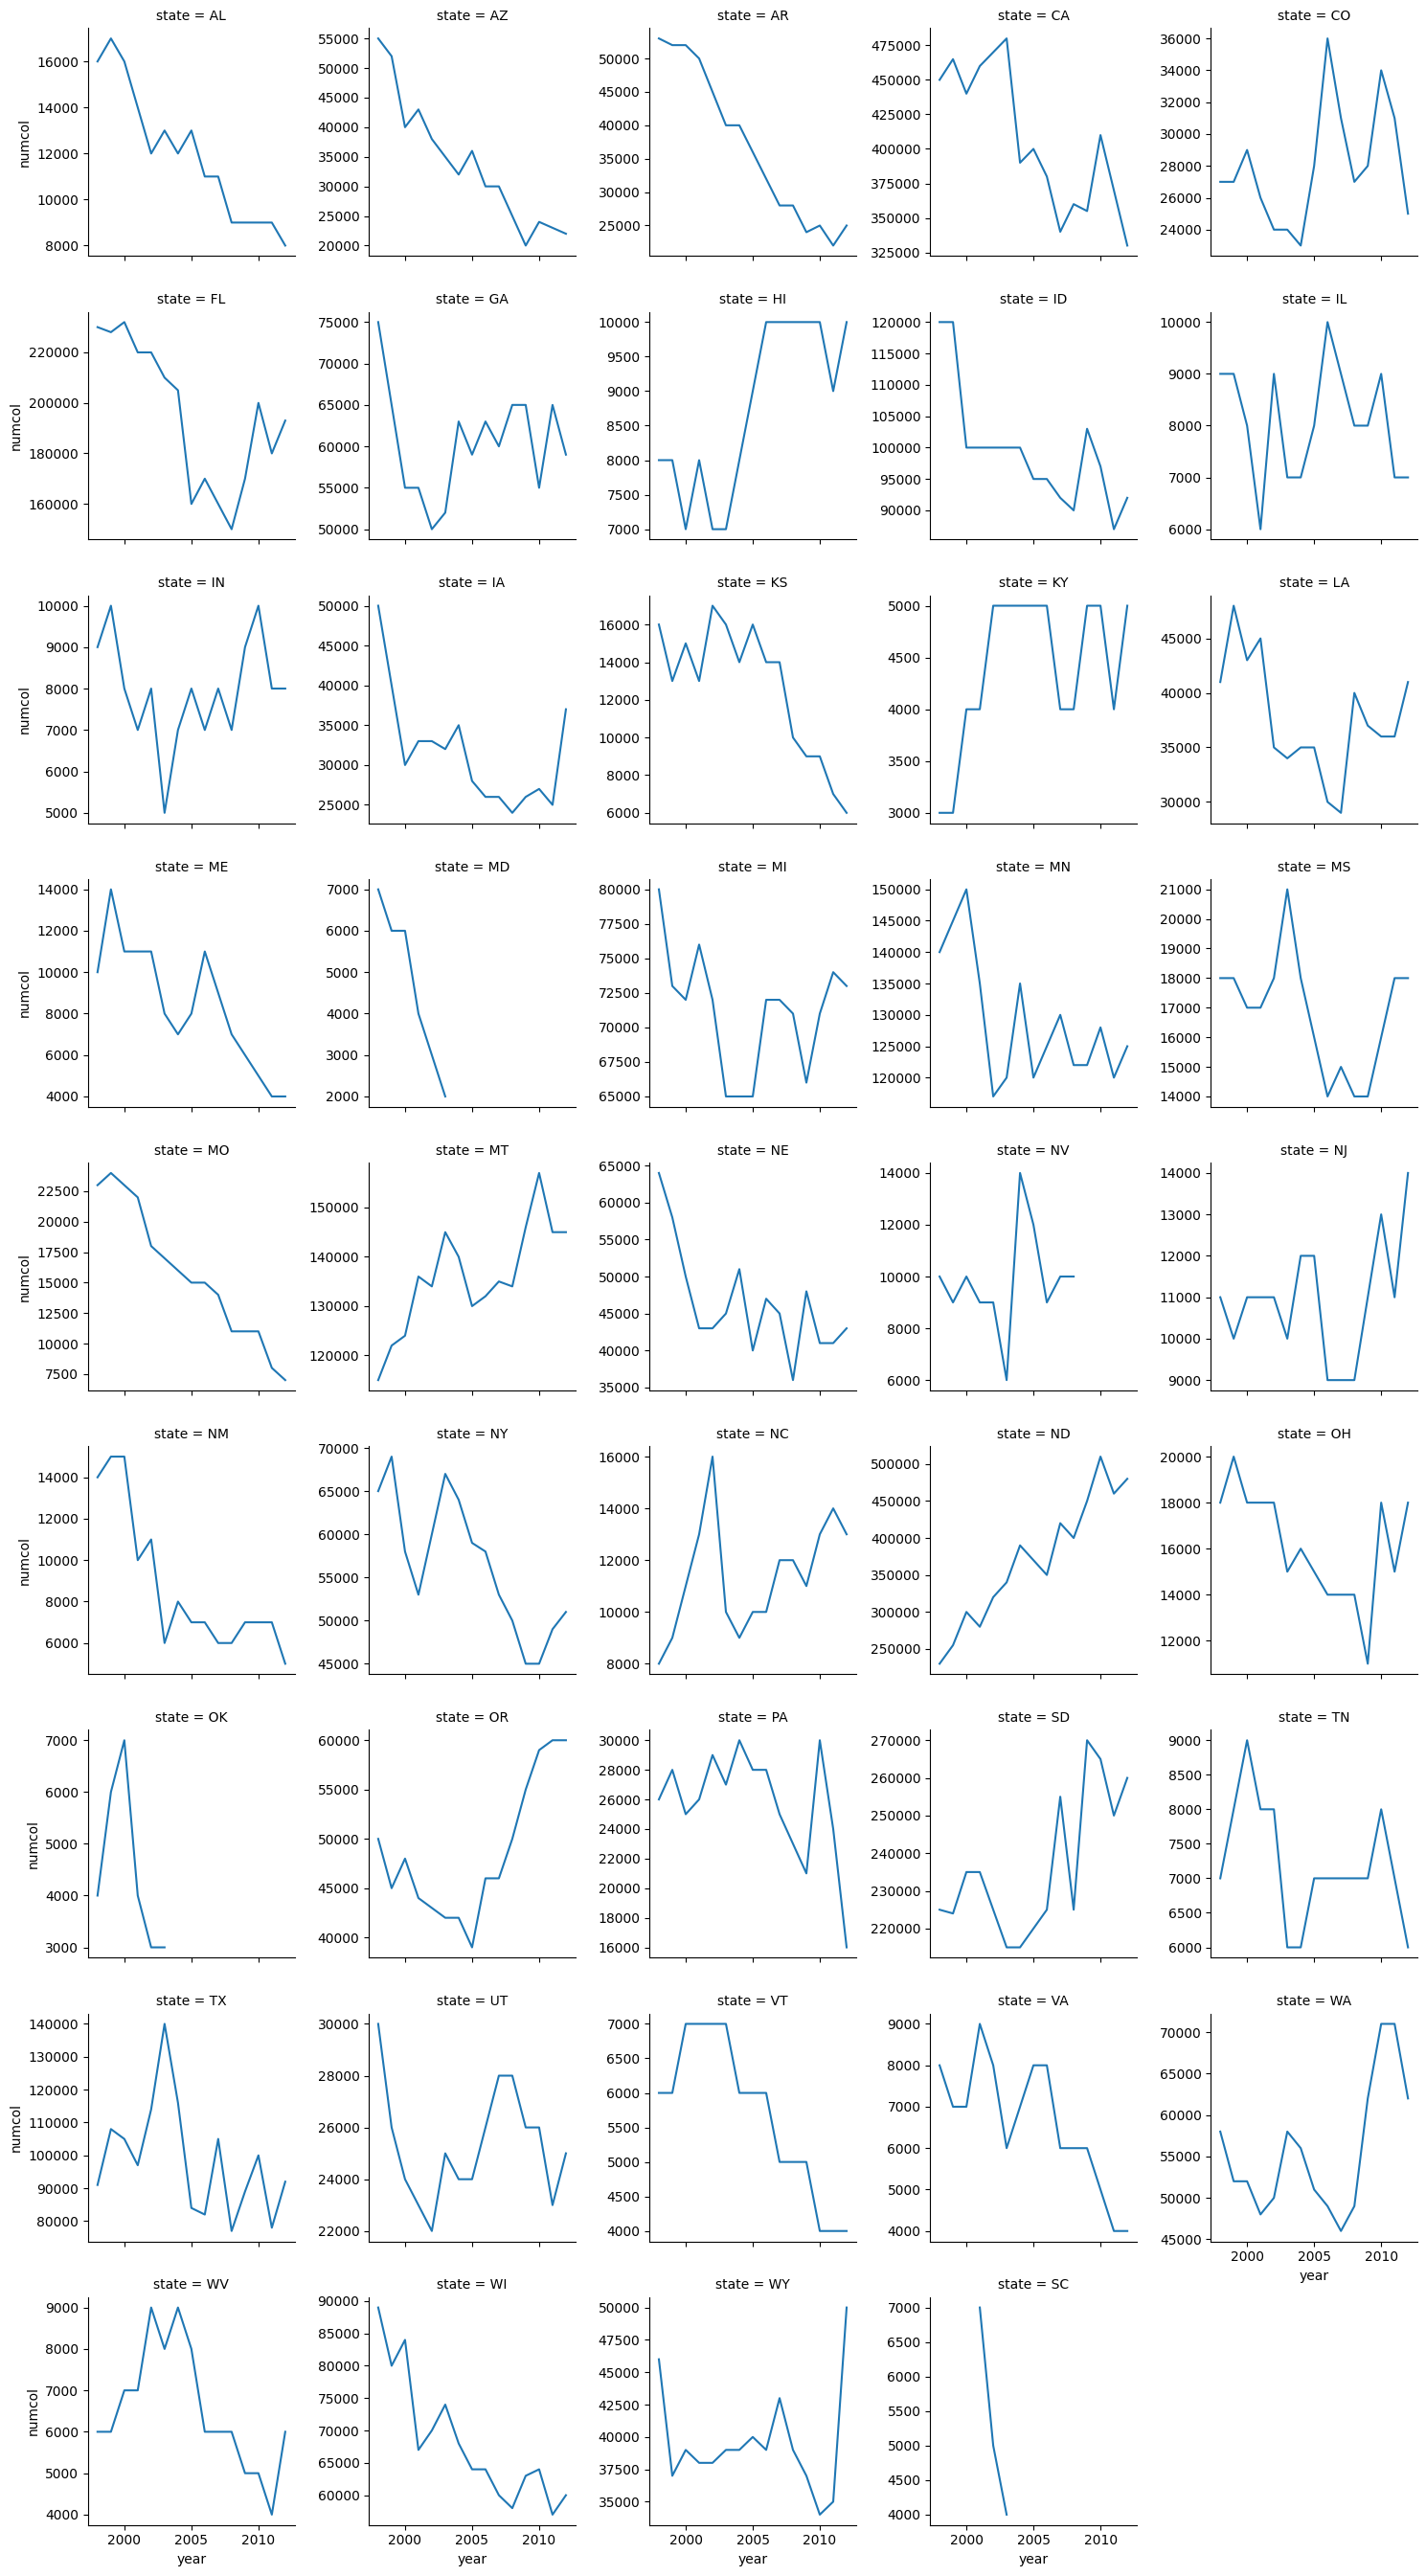

In [33]:
g = sns.FacetGrid(
    data = honey,
    col = "state",
    col_wrap = 5,
    sharey=False
)
g.map_dataframe(sns.lineplot, x = "year", y = "numcol")

We observe that many states show a decline in the number of bee colonies over time. To perform a more detailed analysis, let's plot the year-over-year difference in the number of bee colonies for each state.

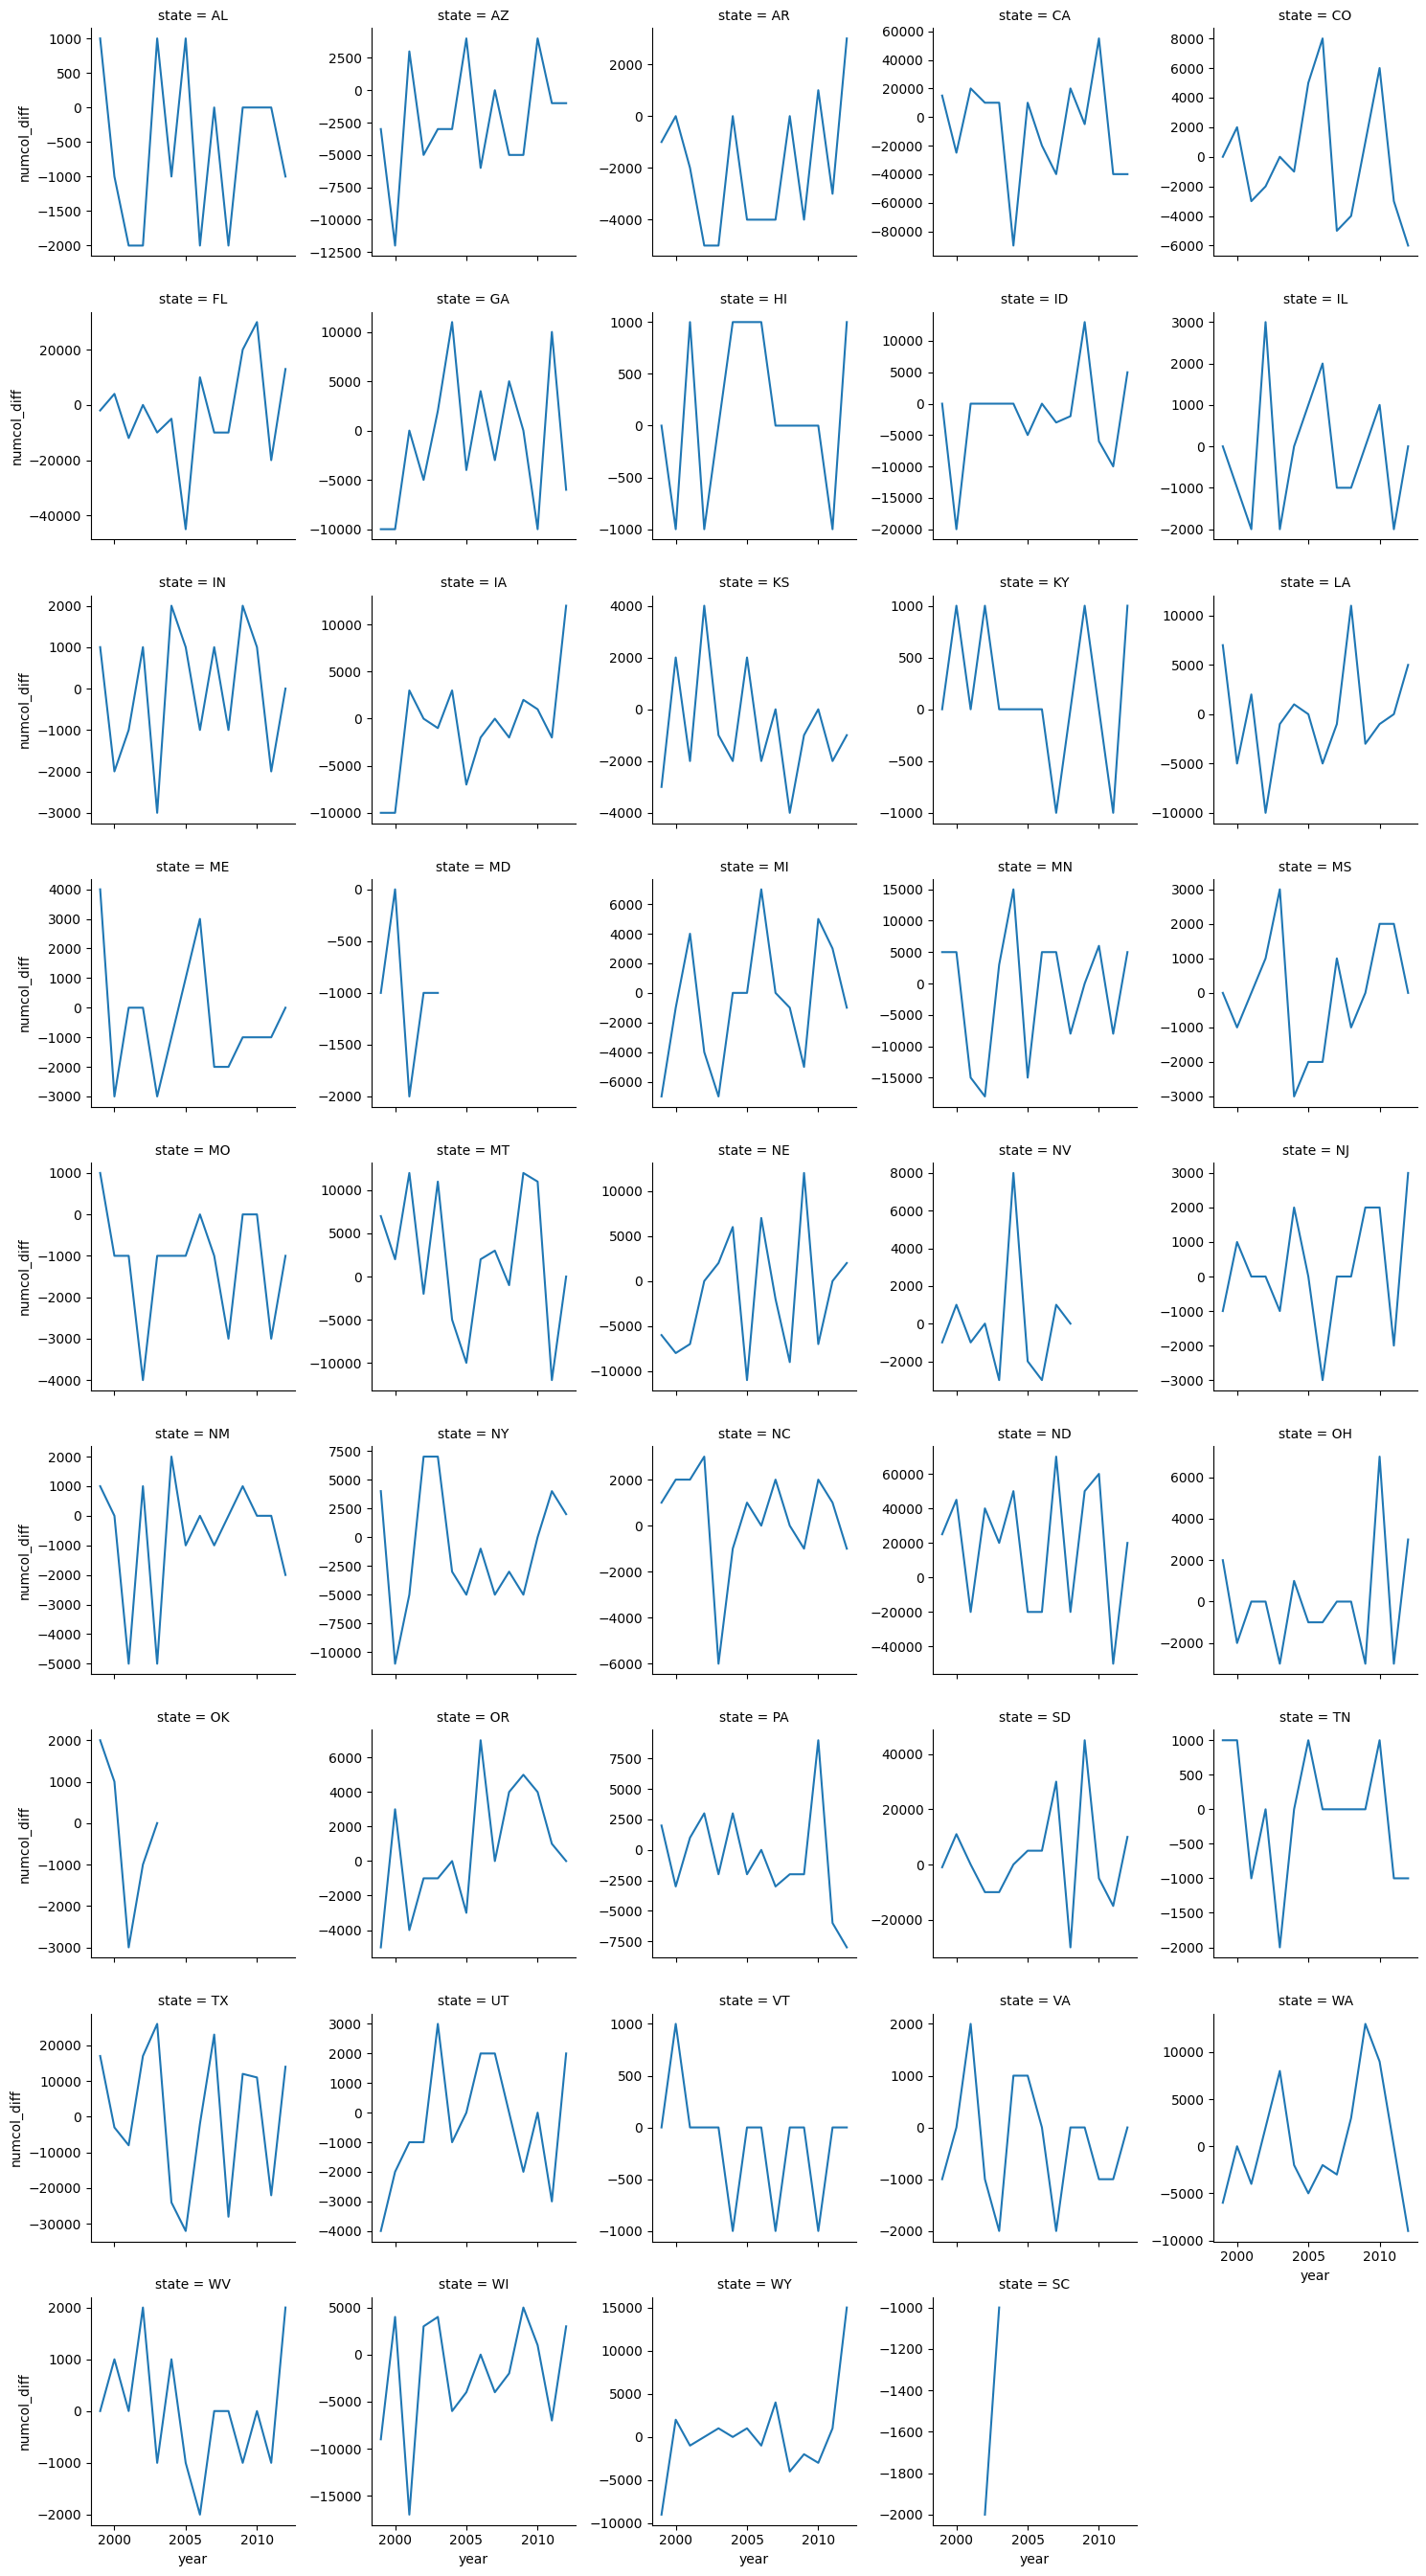

In [34]:
honey['numcol_diff'] = honey.groupby('state')['numcol'].diff()
g = sns.FacetGrid(
    data = honey,
    col = "state",
    col_wrap = 5,
    sharey=False
)
g.map_dataframe(sns.lineplot, x = "year", y = "numcol_diff")

We can see a lot of states having negative rate of change in the number of bee colonies over time. That is indeed bad!

### Analyzing the average number of bees in a colony for each year.

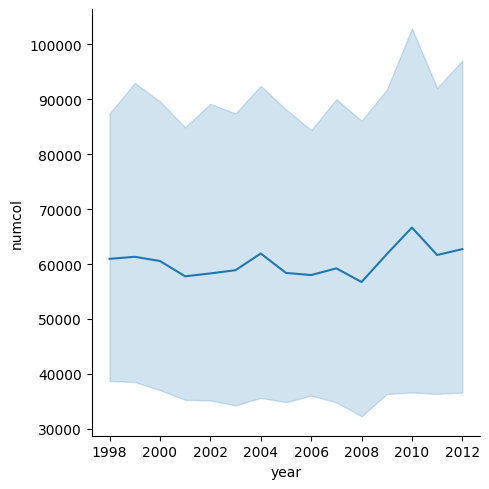

In [35]:
sns.relplot(data = honey, x = "year", y = "numcol", kind = "line")

Because Seaborn is aggregating data around one line, it displays "the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean".
We can see that the confidence interval (depicted by the light blue shaded region) is very wide. This is important as it tell us how confident we are in our estimate of the mean (the blue line), which is not very good. This is evident from figure 2, showing different values and the difference is massive.

## Showing the Relationship Between the Number of Bee Colonies and the Number of Honey produced.

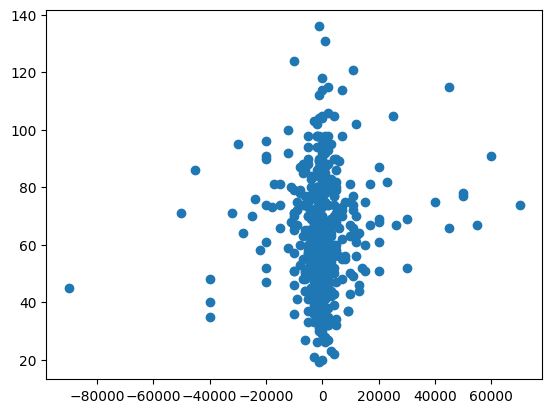

In [38]:
plt.scatter(honey['numcol_diff'], honey['yieldpercol'])

While we cannot really be sure from the given dataset about the health of the bees, the plots for the number of bees in a colony per year for each state and the rate of change certainly gives us a good start.